In [ ]:
Loading and Combining Data

In [ ]:
import pandas as pd

def load_data():
    countries = ['India', 'Canada', 'China', 'Great Britain', 'Japan', 'South Africa', 'USA']
    dfs = []
    for country in countries:
        try:
            df = pd.read_csv(f'{country}.csv')
            dfs.append(df)
        except FileNotFoundError:
            print(f"Warning: Data file for {country} not found")
    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

df = load_data()
print(df.head())


   Total Population  Female Population  Male Population  Birth Rate  \
0        37058856.0         18674525.0       18384331.0   14.693103   
1        36540268.0         18417231.0       18123037.0   10.300000   
2        36109487.0         18202997.0       17906490.0   10.600000   
3        35702908.0         17999309.0       17703599.0   10.700000   
4        35437435.0         17864828.0       17572607.0   10.800000   

   Death Rate  Compulsory Education Dur.  Employment in Industry(%)  \
0    7.237931                       10.0                     19.455   
1    7.500000                       10.0                     19.528   
2    7.400000                       10.0                     19.649   
3    7.400000                       10.0                     19.923   
4    7.300000                       10.0                     20.177   

   Employment in Agriculture(%)  Female Employment in Agriculture(%)  \
0                         1.502                                0.947   
1 

In [ ]:
Analyzing Data Characteristics

In [ ]:
def analyze_data_characteristics(df, country=None):
    if country:
        df = df[df['Country'] == country]
        print(f"\nAnalyzing data for {country}")
    print("\nBasic Information:")
    print(df.info())
    print("\nDescriptive Statistics:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())

analyze_data_characteristics(df, country='India')



Analyzing data for India

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Total Population                            0 non-null      float64
 1   Female Population                           0 non-null      float64
 2   Male Population                             0 non-null      float64
 3   Birth Rate                                  0 non-null      float64
 4   Death Rate                                  0 non-null      float64
 5   Compulsory Education Dur.                   0 non-null      float64
 6   Employment in Industry(%)                   0 non-null      float64
 7   Employment in Agriculture(%)                0 non-null      float64
 8   Female Employment in Agriculture(%)         0 non-null      float64
 9   Female Employment in Industry(%)            0 non-null    

In [ ]:
0.................Statistical Analysis with Correlation and Visualizations

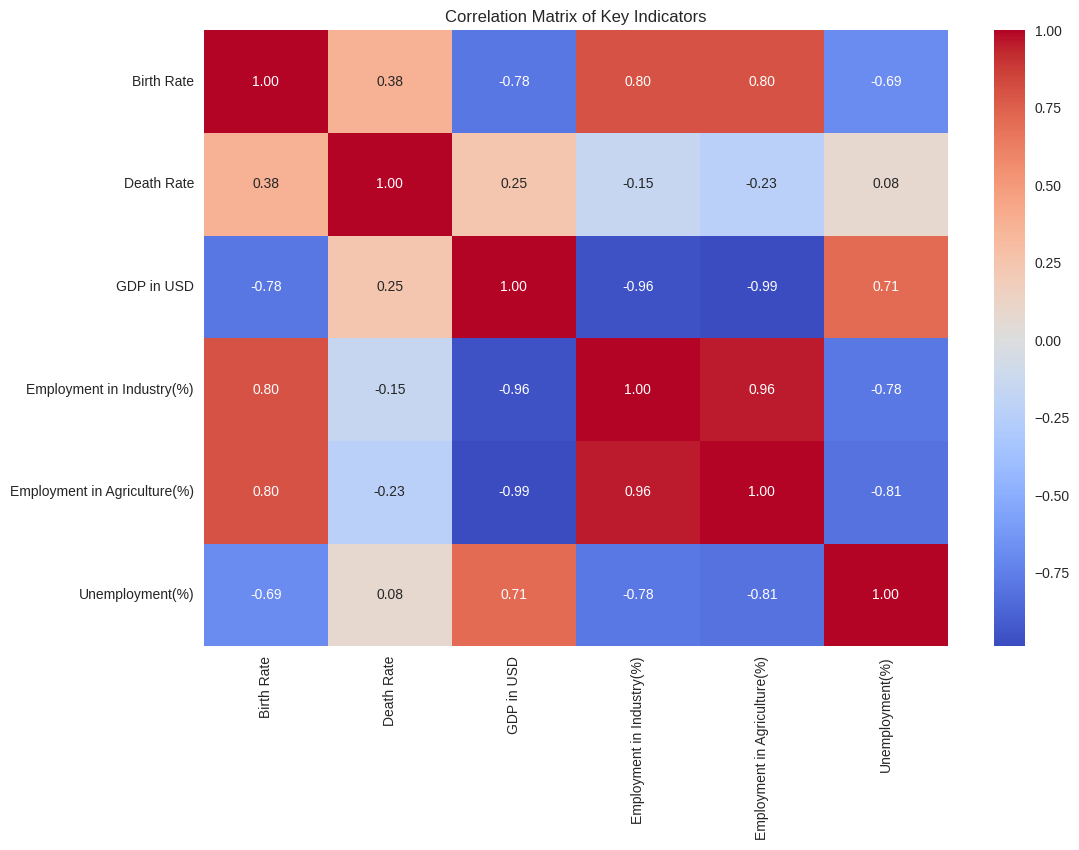

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def statistical_analysis(df, countries=None, start_year=None, end_year=None):
    if countries:
        df = df[df['Country'].isin(countries)]
    if start_year:
        df = df[df['Year'] >= start_year]
    if end_year:
        df = df[df['Year'] <= end_year]

    numeric_cols = ['Birth Rate', 'Death Rate', 'GDP in USD', 'Employment in Industry(%)',
                   'Employment in Agriculture(%)', 'Unemployment(%)']
    correlation_matrix = df[numeric_cols].corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Key Indicators')
    plt.show()

statistical_analysis(df, countries=['India', 'USA'], start_year=2010, end_year=2020)


In [ ]:
Supervised Learning with Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

def linear_regression_model(df):
    X = df[['Birth Rate', 'Death Rate', 'Employment in Industry(%)', 'Employment in Agriculture(%)']]
    y = df['GDP in USD']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    y_pred = lr_model.predict(X_test_scaled)

    print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")

linear_regression_model(df)


R2 Score: 0.1060
MSE: 17999896453991489364557824.0000


In [ ]:
Unsupervised Learning with K-means Clustering

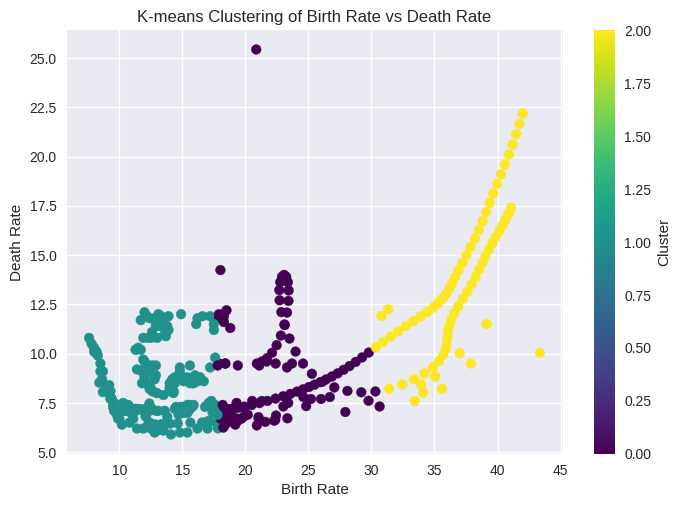

In [ ]:
from sklearn.cluster import KMeans

def kmeans_clustering(df):
    features_for_clustering = df[['Birth Rate', 'Death Rate']].values
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(features_for_clustering)

    plt.scatter(features_for_clustering[:, 0], features_for_clustering[:, 1], c=clusters, cmap='viridis')
    plt.xlabel('Birth Rate')
    plt.ylabel('Death Rate')
    plt.title('K-means Clustering of Birth Rate vs Death Rate')
    plt.colorbar(label='Cluster')
    plt.show()

kmeans_clustering(df)


Evaluating Model Techniques for GDP Prediction


In [ ]:
def evaluate_techniques(df):
    X = df[['Birth Rate', 'Death Rate', 'Employment in Industry(%)', 'Employment in Agriculture(%)']]
    y = df['GDP in USD']

    models = {'Linear Regression': LinearRegression()}
    results = {}

    for name, model in models.items():
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = {
            'R2': r2_score(y_test, y_pred),
            'MSE': mean_squared_error(y_test, y_pred)
        }
        print(f"\n{name} Performance:\nR2 Score: {results[name]['R2']:.4f}, MSE: {results[name]['MSE']:.4f}")

evaluate_techniques(df)



Linear Regression Performance:
R2 Score: 0.1060, MSE: 17999896453991493659525120.0000


Solution Implementation with Trends Visualization


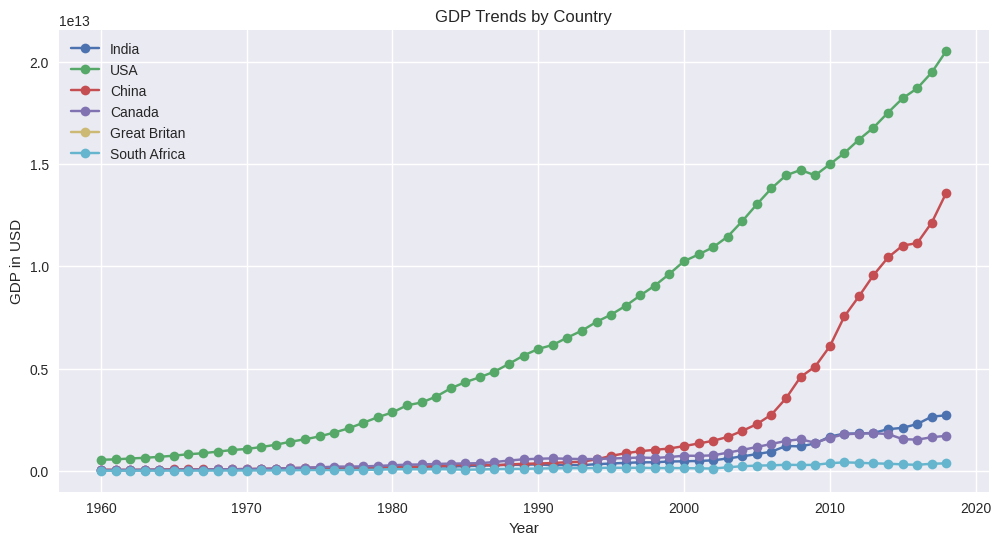

In [ ]:
def plot_trends(df, countries=None):
    if not countries:
        countries = df['Country'].unique()
    plt.figure(figsize=(12, 6))
    for country in countries:
        country_data = df[df['Country'] == country]
        plt.plot(country_data['Year'], country_data['GDP in USD'], marker='o', label=country)
    plt.title('GDP Trends by Country')
    plt.xlabel('Year')
    plt.ylabel('GDP in USD')
    plt.legend()
    plt.show()

plot_trends(df, countries=['India', 'USA', 'China','Canada','Great Britan','South Africa'])


performance Assessment

In [ ]:
def assess_performance(df, country=None):
    X = df[['Birth Rate', 'Death Rate', 'Employment in Industry(%)', 'Employment in Agriculture(%)']]
    y = df['GDP in USD']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Performance Assessment Metrics:")
    print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

assess_performance(df)


Performance Assessment Metrics:
R2 Score: 0.1060
MSE: 17999896453991493659525120.0000
RMSE: 4242628484087.6055


**FOR** **INDIA**

In [ ]:
import pandas as pd

def load_data():
    # Load data from the file
    data = pd.read_csv('India.csv')
    return data

# Execute and print the loaded data
df = load_data()
print("Data Loaded Successfully:\n", df.head())


Data Loaded Successfully:
    Total Population  Female Population  Birth Rate  Death Rate  \
0      1.352617e+09        649574719.0   31.324362   12.256448   
1      1.338659e+09        642787641.0   18.083000    7.210000   
2      1.324510e+09        635908885.0   18.332000    7.195000   
3      1.310152e+09        628929065.0   18.625000    7.194000   
4      1.295604e+09        621854638.0   18.984000    7.212000   

   Compulsory Education Dur.  Employment in Industry(%)  \
0                        8.0                  24.686001   
1                        8.0                  24.473000   
2                        8.0                  24.289000   
3                        8.0                  24.339001   
4                        8.0                  24.379999   

   Employment in Agriculture(%)  Female Employment in Agriculture(%)  \
0                     43.860001                            57.060001   
1                     44.521999                            57.625000   
2    

Data Characteristics Analysis

In [ ]:
def analyze_data_characteristics(df):
    print("\nCO1: Data Characteristics Analysis")
    print("\nBasic Information:")
    print(df.info())
    print("\nDescriptive Statistics:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())

# Execute data characteristics analysis
analyze_data_characteristics(df)



CO1: Data Characteristics Analysis

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Total Population                            59 non-null     float64
 1   Female Population                           59 non-null     float64
 2   Birth Rate                                  59 non-null     float64
 3   Death Rate                                  59 non-null     float64
 4   Compulsory Education Dur.                   59 non-null     float64
 5   Employment in Industry(%)                   59 non-null     float64
 6   Employment in Agriculture(%)                59 non-null     float64
 7   Female Employment in Agriculture(%)         59 non-null     float64
 8   Female Employment in Industry(%)            59 non-null     float64
 9   Unemployment(%)                  

Correlation Analysis


CO2: Correlation Analysis


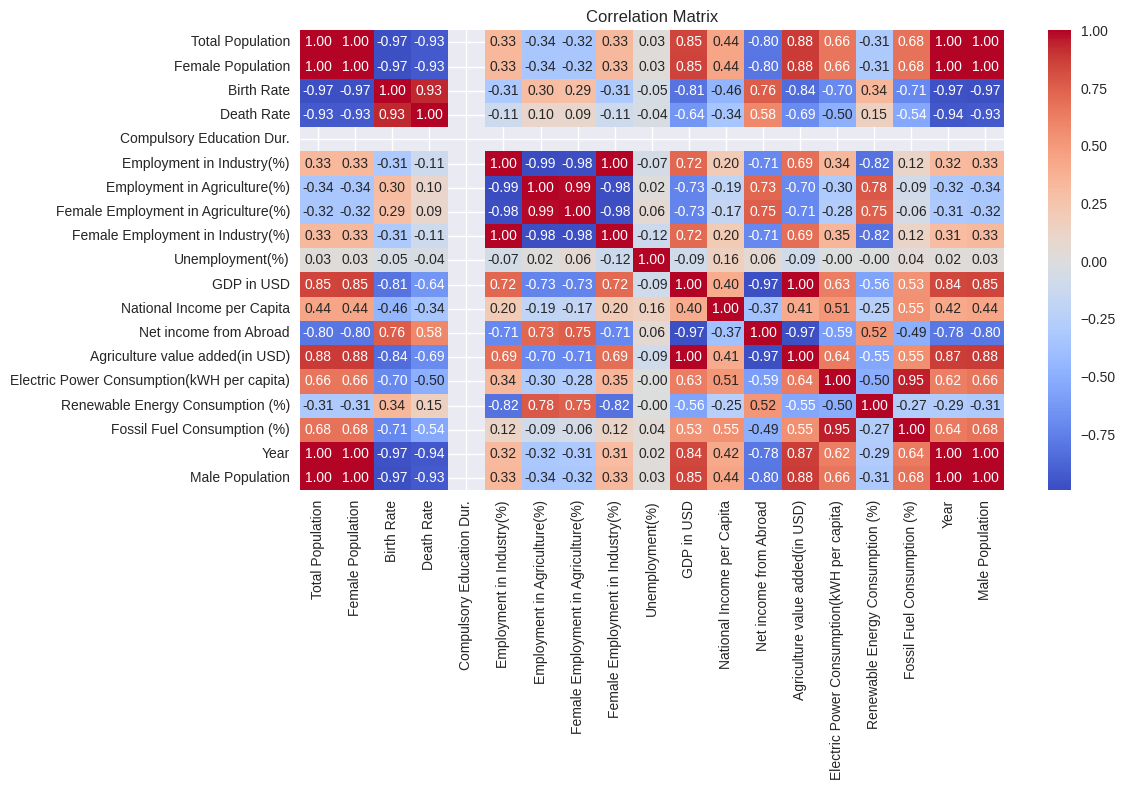

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def correlation_analysis(df):
    print("\nCO2: Correlation Analysis")

    # Correlation matrix
    correlation_matrix = df.select_dtypes(include=[np.number]).corr()

    # Plotting correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

# Execute correlation analysis
correlation_analysis(df)


Birth and Death Rates Analysis


CO2: Birth and Death Rate Analysis


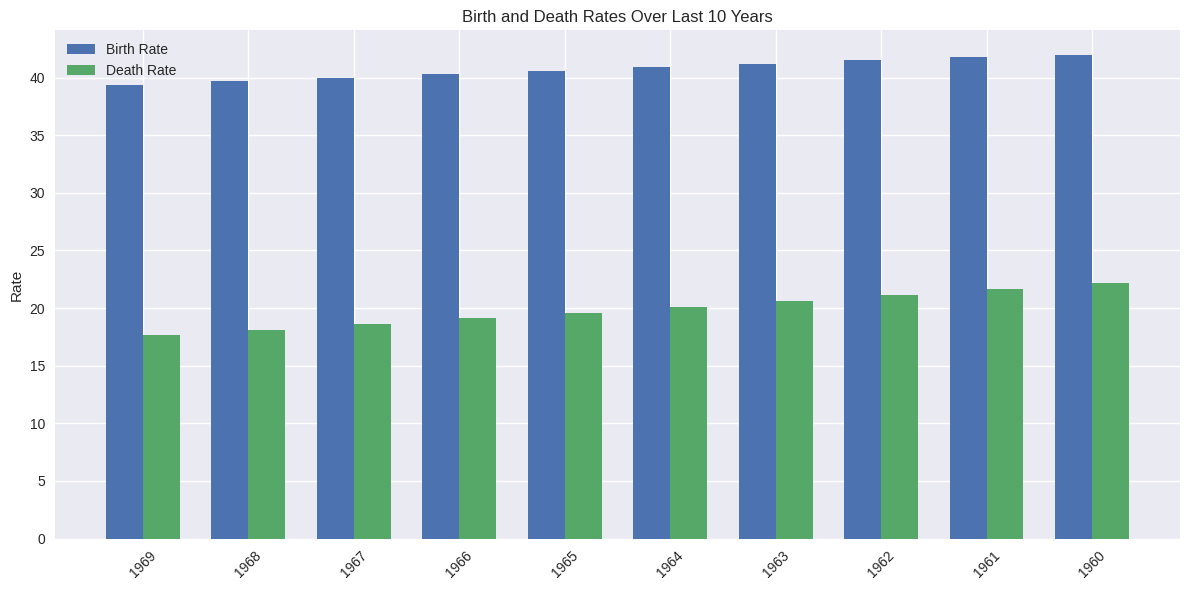

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def birth_death_rate_analysis(df):
    print("\nCO2: Birth and Death Rate Analysis")

    # Grouped bar chart for Birth Rate and Death Rate
    years = df['Year'].unique()[-10:]  # Last 10 years
    birth_rates = df[df['Year'].isin(years)]['Birth Rate']
    death_rates = df[df['Year'].isin(years)]['Death Rate']

    x = np.arange(len(years))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width/2, birth_rates, width, label='Birth Rate')
    ax.bar(x + width/2, death_rates, width, label='Death Rate')

    ax.set_ylabel('Rate')
    ax.set_title('Birth and Death Rates Over Last 10 Years')
    ax.set_xticks(x)
    ax.set_xticklabels(years, rotation=45)
    ax.legend()
    plt.tight_layout()
    plt.show()

# Execute birth and death rate analysis
birth_death_rate_analysis(df)


GDP Trend Analysis


CO2: GDP Trend Analysis


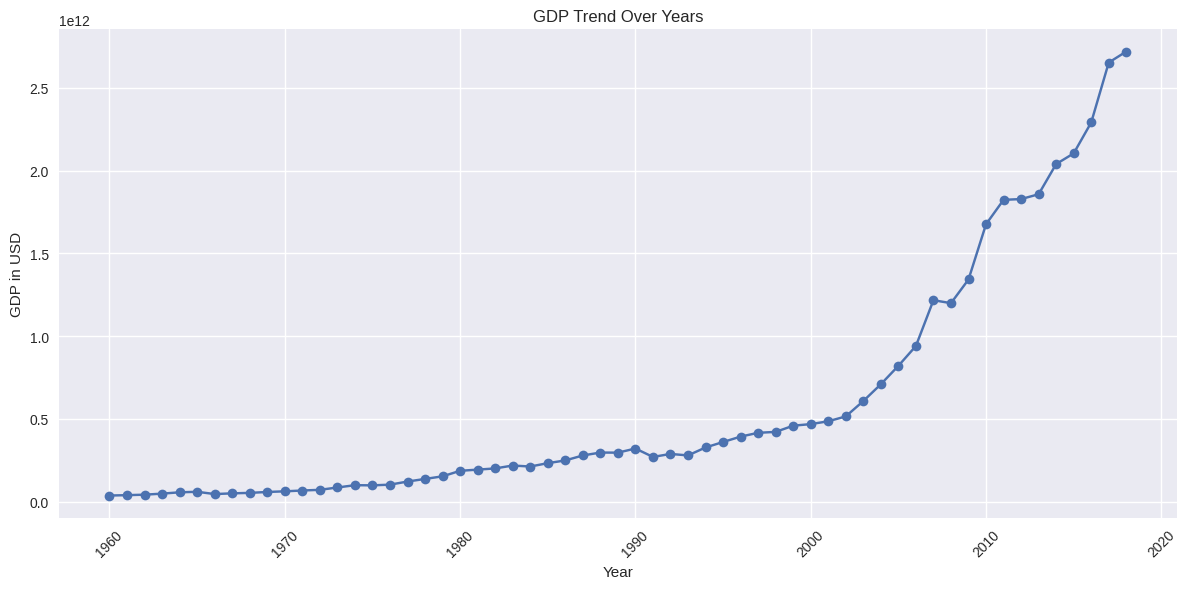

In [ ]:
import matplotlib.pyplot as plt

def gdp_trend_analysis(df):
    print("\nCO2: GDP Trend Analysis")

    # Line plot for GDP
    plt.figure(figsize=(12, 6))
    plt.plot(df['Year'], df['GDP in USD'], marker='o')
    plt.title('GDP Trend Over Years')
    plt.xlabel('Year')
    plt.ylabel('GDP in USD')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Execute GDP trend analysis
gdp_trend_analysis(df)


Linear Regression for GDP Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression_gdp(df):
    print("\nCO3: Linear Regression for GDP Prediction")

    # Prepare data for GDP prediction
    X = df[['Birth Rate', 'Death Rate', 'Employment in Industry(%)', 'Employment in Agriculture(%)']]
    y = df['GDP in USD']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Linear Regression (Supervised Learning)
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    y_pred = lr_model.predict(X_test_scaled)
    print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")

# Execute linear regression for GDP prediction
linear_regression_gdp(df)



CO3: Linear Regression for GDP Prediction
R2 Score: 0.7620
MSE: 195327642596837708267520.0000


K-means Clustering on Birth and Death Rates


CO3: K-means Clustering on Birth and Death Rates


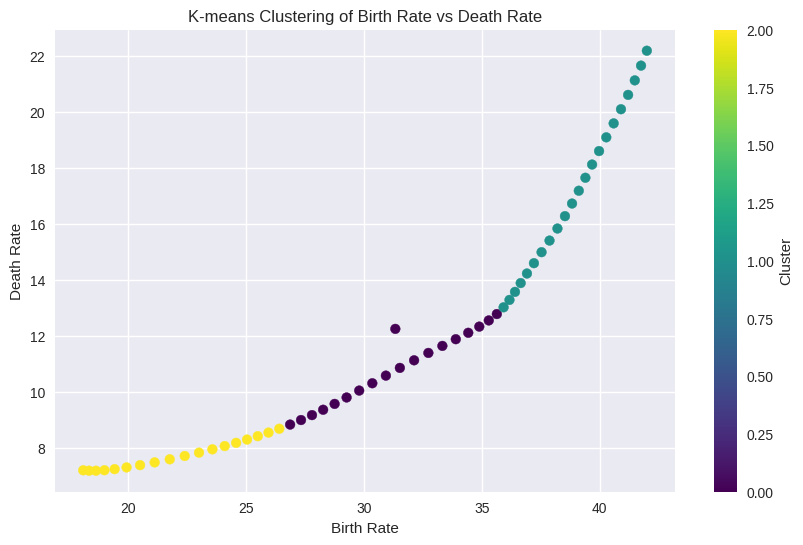

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kmeans_clustering(df):
    print("\nCO3: K-means Clustering on Birth and Death Rates")

    # K-means Clustering (Unsupervised Learning)
    features_for_clustering = df[['Birth Rate', 'Death Rate']].values
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(features_for_clustering)

    plt.figure(figsize=(10, 6))
    plt.scatter(features_for_clustering[:, 0], features_for_clustering[:, 1], c=clusters, cmap='viridis')
    plt.xlabel('Birth Rate')
    plt.ylabel('Death Rate')
    plt.title('K-means Clustering of Birth Rate vs Death Rate')
    plt.colorbar(label='Cluster')
    plt.show()

# Execute K-means clustering
kmeans_clustering(df)


Time Series Analysis of GDP


CO5: Time Series Analysis of GDP


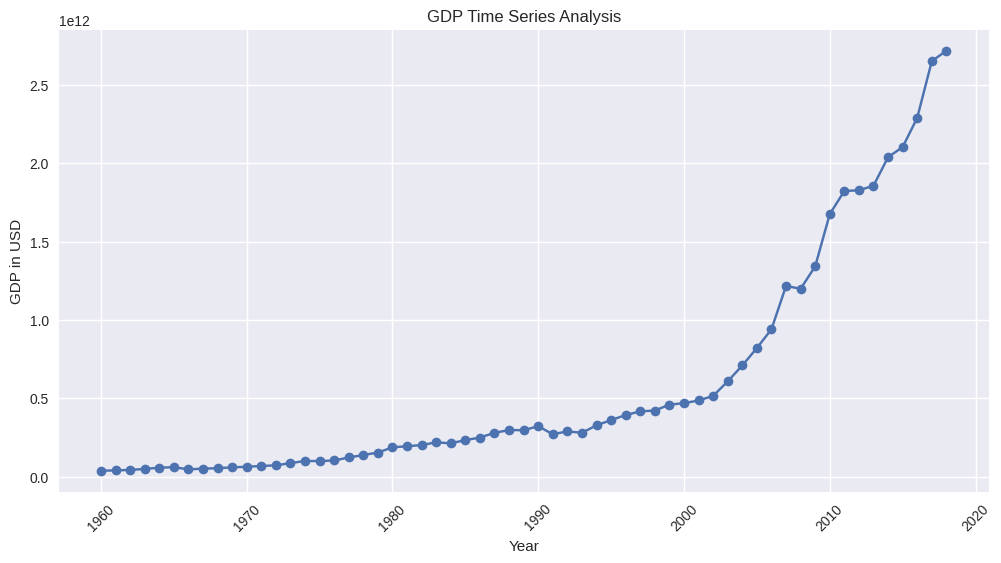

In [ ]:
import matplotlib.pyplot as plt

def time_series_gdp(df):
    print("\nCO5: Time Series Analysis of GDP")

    plt.figure(figsize=(12, 6))
    plt.plot(df['Year'], df['GDP in USD'], marker='o')
    plt.title('GDP Time Series Analysis')
    plt.xlabel('Year')
    plt.ylabel('GDP in USD')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Execute GDP time series analysis
time_series_gdp(df)


Model Performance Assessment

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def assess_model_performance(df):
    print("\nCO6: Model Performance Assessment")

    # Prepare data for GDP prediction
    X = df[['Birth Rate', 'Death Rate', 'Employment in Industry(%)', 'Employment in Agriculture(%)']]
    y = df['GDP in USD']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\nModel Performance Metrics:")
    print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# Execute model performance assessment
assess_model_performance(df)



CO6: Model Performance Assessment

Model Performance Metrics:
R2 Score: 0.7620
MSE: 195327642596837876039680.0000
RMSE: 441958869802.1999


**POPULATION** **TRENDS**

In [ ]:
import pandas as pd
df = pd.read_csv('combined_file.csv')



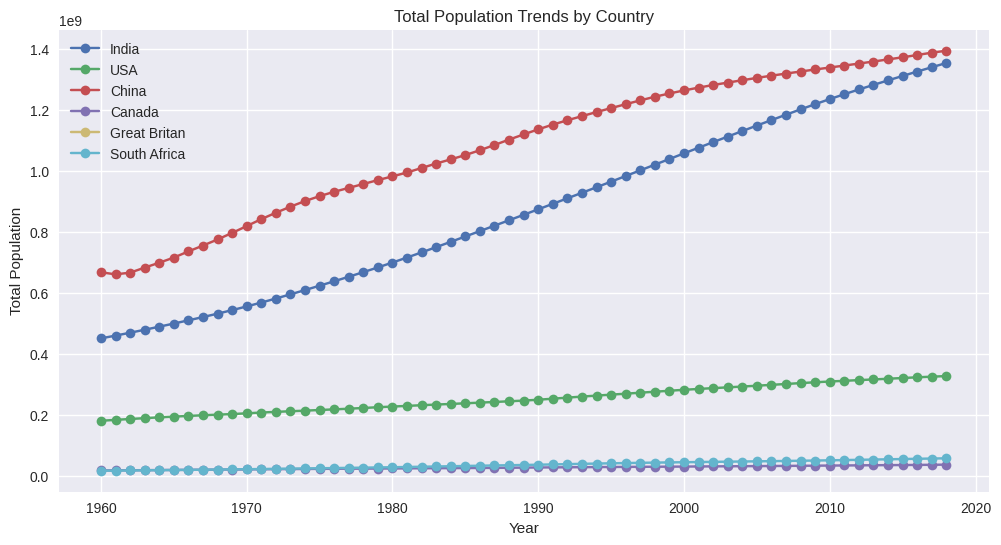

In [ ]:
def plot_population_trends(df, countries=None):
    if not countries:
        countries = df['Country'].unique()

    plt.figure(figsize=(12, 6))

    for country in countries:
        country_data = df[df['Country'] == country]
        plt.plot(country_data['Year'], country_data['Total Population'], marker='o', label=country)

    plt.title('Total Population Trends by Country')
    plt.xlabel('Year')
    plt.ylabel('Total Population')
    plt.legend()
    plt.show()

# Execute the function for specific countries
plot_population_trends(df, countries=['India', 'USA', 'China','Canada','Great Britan','South Africa'])


Generating population projections and analysis...

India projected population for 2030: 1,628.87 million
USA projected population for 2030: 368.91 million
China projected population for 2030: 1,445.13 million
Canada projected population for 2030: 40.58 million
South Africa projected population for 2030: 67.85 million


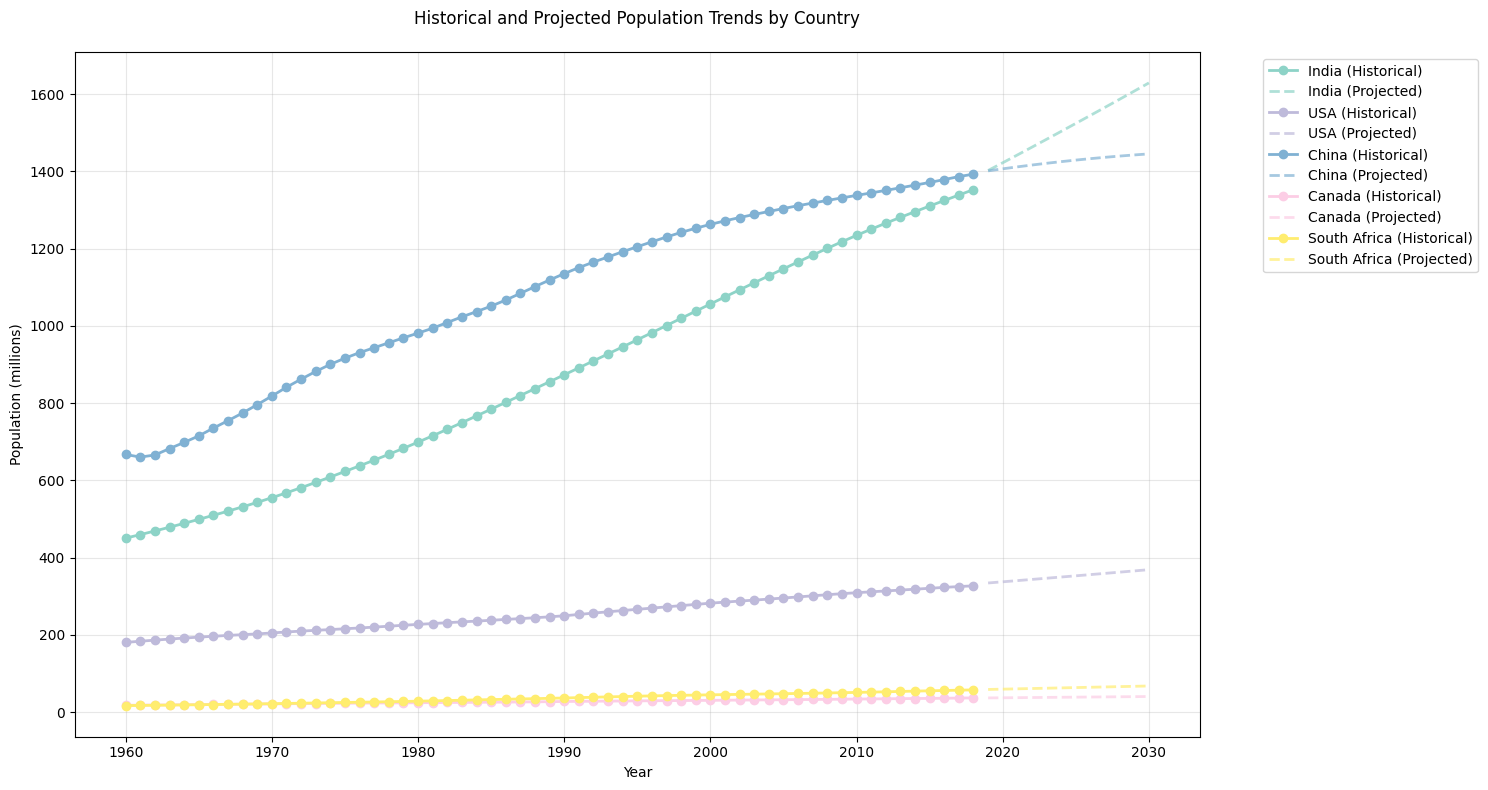

Population Trend Analysis:


India:
Historical average annual growth rate: 1.91%
Projected growth by 2030: 20.42%
Current population (latest data): 1,352.62 million
Projected 2030 population: 1,628.87 million

USA:
Historical average annual growth rate: 1.03%
Projected growth by 2030: 12.76%
Current population (latest data): 327.17 million
Projected 2030 population: 368.91 million

China:
Historical average annual growth rate: 1.28%
Projected growth by 2030: 3.76%
Current population (latest data): 1,392.73 million
Projected 2030 population: 1,445.13 million

Canada:
Historical average annual growth rate: 1.26%
Projected growth by 2030: 9.51%
Current population (latest data): 37.06 million
Projected 2030 population: 40.58 million

South Africa:
Historical average annual growth rate: 2.12%
Projected growth by 2030: 17.43%
Current population (latest data): 57.78 million
Projected 2030 population: 67.85 million


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Read the CSV file
df = pd.read_csv('/content/combined_file.csv')

def preprocess_data(df):
    """
    Prepare the data for modeling by ensuring correct data types
    and handling any missing values
    """
    # Convert Year to numeric if it isn't already
    df['Year'] = pd.to_numeric(df['Year'])
    df['Total Population'] = pd.to_numeric(df['Total Population'], errors='coerce')

    # Drop any rows with missing values
    df = df.dropna()

    # Sort by year for each country
    df = df.sort_values(['Country', 'Year'])

    return df

def train_population_model(country_data):
    """
    Train a polynomial regression model for population projection
    """
    X = country_data['Year'].values.reshape(-1, 1)
    y = country_data['Total Population'].values

    # Create polynomial features (degree=2 for curve fitting)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # Train the model
    model = LinearRegression()
    model.fit(X_poly, y)

    return model, poly

def project_population(model, poly, last_year, target_year=2030):
    """
    Project population for a specific year using the trained model
    """
    future_years = np.array(range(last_year + 1, target_year + 1))
    future_years_poly = poly.transform(future_years.reshape(-1, 1))
    projections = model.predict(future_years_poly)

    return future_years, projections

def plot_historical_and_projected(df, countries=None, target_year=2030):
    """
    Plot historical data and projections for specified countries
    """
    processed_df = preprocess_data(df)

    if countries is None:
        # Select top 6 countries by population if none specified
        latest_year = processed_df['Year'].max()
        top_countries = processed_df[processed_df['Year'] == latest_year] \
            .nlargest(6, 'Total Population')['Country'].tolist()
        countries = top_countries

    plt.figure(figsize=(15, 8))
    colors = plt.cm.Set3(np.linspace(0, 1, len(countries)))  # Color palette

    for idx, country in enumerate(countries):
        # Get historical data for the country
        country_data = processed_df[processed_df['Country'] == country]

        if len(country_data) < 2:  # Skip if not enough data points
            continue

        # Train model and make projections
        try:
            model, poly = train_population_model(country_data)
            last_year = country_data['Year'].max()
            future_years, projections = project_population(model, poly, last_year, target_year)

            # Plot historical data
            plt.plot(country_data['Year'], country_data['Total Population']/1e6,
                    marker='o', color=colors[idx], linewidth=2,
                    label=f'{country} (Historical)')

            # Plot projections
            plt.plot(future_years, projections/1e6, '--', color=colors[idx],
                    alpha=0.7, linewidth=2, label=f'{country} (Projected)')

            # Print 2030 projection
            projected_2030 = projections[-1]
            print(f"{country} projected population for 2030: {projected_2030/1e6:,.2f} million")

        except Exception as e:
            print(f"Could not process data for {country}: {str(e)}")

    plt.title('Historical and Projected Population Trends by Country', pad=20)
    plt.xlabel('Year')
    plt.ylabel('Population (millions)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def analyze_population_trends(df, countries=None):
    """
    Analyze population trends and print insights
    """
    processed_df = preprocess_data(df)

    if countries is None:
        # Select top 6 countries by population if none specified
        latest_year = processed_df['Year'].max()
        top_countries = processed_df[processed_df['Year'] == latest_year] \
            .nlargest(6, 'Total Population')['Country'].tolist()
        countries = top_countries

    print("Population Trend Analysis:\n")

    for country in countries:
        country_data = processed_df[processed_df['Country'] == country]

        if len(country_data) < 2:  # Skip if not enough data points
            continue

        try:
            # Calculate historical growth rate
            total_years = country_data['Year'].max() - country_data['Year'].min()
            total_growth = (country_data['Total Population'].iloc[-1] /
                          country_data['Total Population'].iloc[0]) - 1
            avg_annual_growth = (1 + total_growth) ** (1/total_years) - 1

            print(f"\n{country}:")
            print(f"Historical average annual growth rate: {avg_annual_growth:.2%}")

            # Train model and get 2030 projection
            model, poly = train_population_model(country_data)
            last_year = country_data['Year'].max()
            _, projections = project_population(model, poly, last_year)

            # Calculate projected growth
            current_pop = country_data['Total Population'].iloc[-1]
            projected_2030 = projections[-1]
            projected_growth = (projected_2030 / current_pop) - 1

            print(f"Projected growth by 2030: {projected_growth:.2%}")
            print(f"Current population (latest data): {current_pop/1e6:,.2f} million")
            print(f"Projected 2030 population: {projected_2030/1e6:,.2f} million")

        except Exception as e:
            print(f"Could not analyze trends for {country}: {str(e)}")

# Define countries you want to analyze
countries_of_interest = ['India', 'USA', 'China', 'Canada', 'United Kingdom', 'South Africa']

# Generate visualizations and analysis
print("Generating population projections and analysis...\n")
plot_historical_and_projected(df, countries=countries_of_interest)
analyze_population_trends(df, countries=countries_of_interest)